# Análise e Exploração Breast Cancer Wisconsin

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data --unzip


Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 50.0MB/s]


In [38]:
df_cancer = pd.read_csv('data.csv')
df_cancer.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [39]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [40]:
df_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [41]:
df_cancer.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [42]:
df_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [43]:
df_cancer.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [44]:
df_cancer['diagnosis'] = df_cancer['diagnosis'].map({'M': 1, 'B': 0})

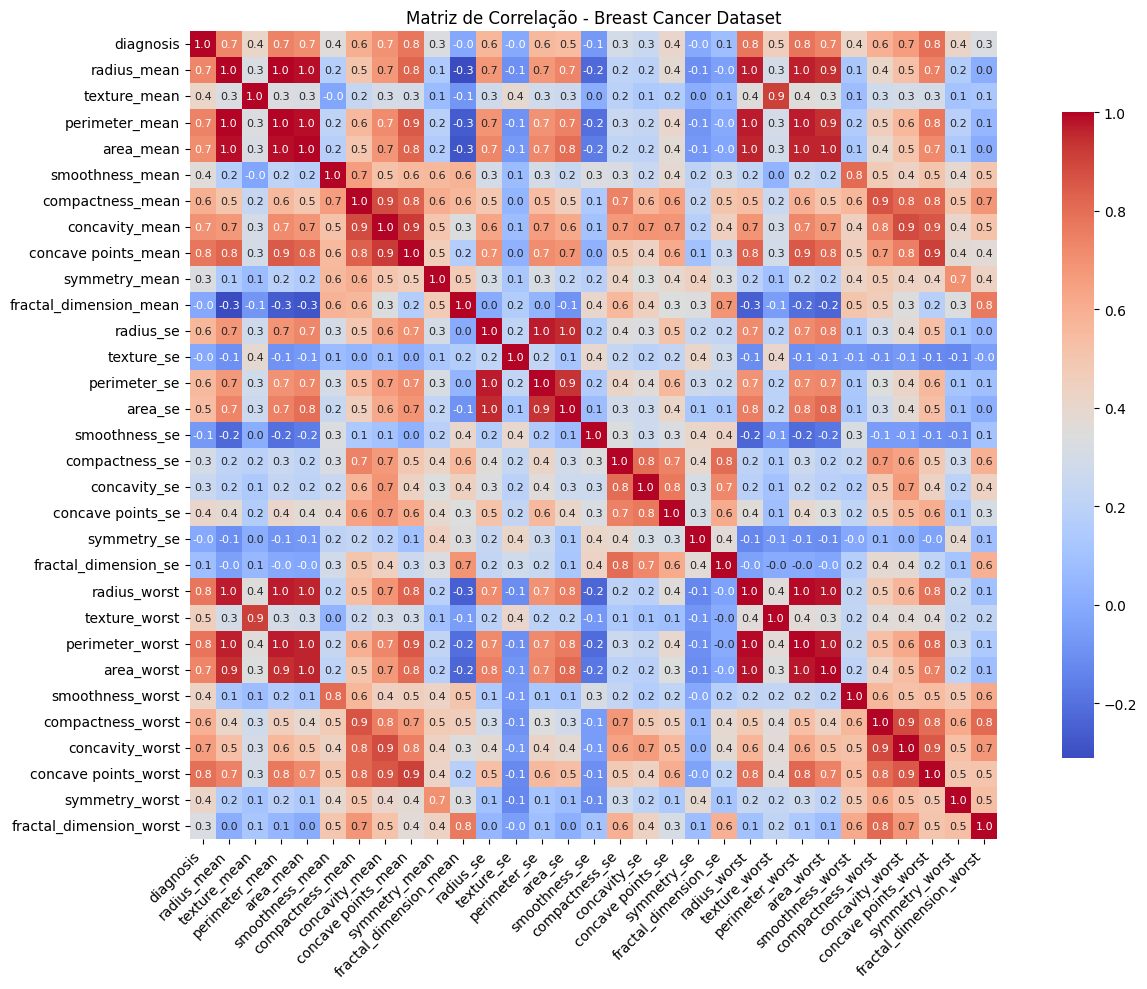

In [45]:
correlation_matrix = df_cancer.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", annot_kws={"size": 8}, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Matriz de Correlação - Breast Cancer Dataset")
plt.tight_layout()
plt.show()

##### Avaliação Correlação

Observamos que algumas variáveis são bastante relevantes para diferenciar entre diagnósticos malignos e benignos, como radius_mean, perimeter_mean, area_mean, entre outras que apresentam correlação acima de 0,5 com o diagnóstico. Essas variáveis têm um papel importante na definição de cada uma das classes, indicando que elas podem contribuir significativamente para a separação entre diagnósticos benignos e malignos. Dessa forma, as classes estão bem definidas, e a análise gráfica pode nos ajudar a visualizar melhor esse comportamento.

<ipython-input-46-e6cd58e90b38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='radius_mean', data=df_cancer, palette="coolwarm")


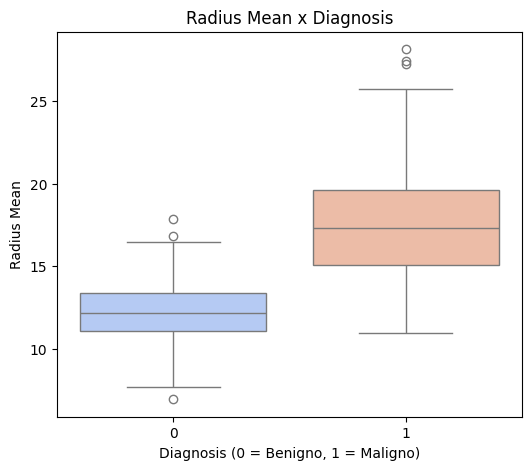

In [46]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='diagnosis', y='radius_mean', data=df_cancer, palette="coolwarm")
plt.title("Radius Mean x Diagnosis")
plt.xlabel("Diagnosis (0 = Benigno, 1 = Maligno)")
plt.ylabel("Radius Mean")
plt.show()

O radius_mean descreve o raio médio dos núcleos das células tumorais, baseado em imagens de mamografia. Ele é calculado considerando a média dos raios de todas as células tumorais observadas, que são representadas como círculos ou regiões redondas nas imagens.

Mostrando que tumores malignos tem valores maiores do que tumores benignos, assim vemos uma grande diferença das duas classes, e em tumores benignos temos poucos ou nenhum outlier, mostrando a importante dessa variavel em nossas observações.

<ipython-input-47-0a35c3d5f46d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='area_mean', data=df_cancer, palette="coolwarm")


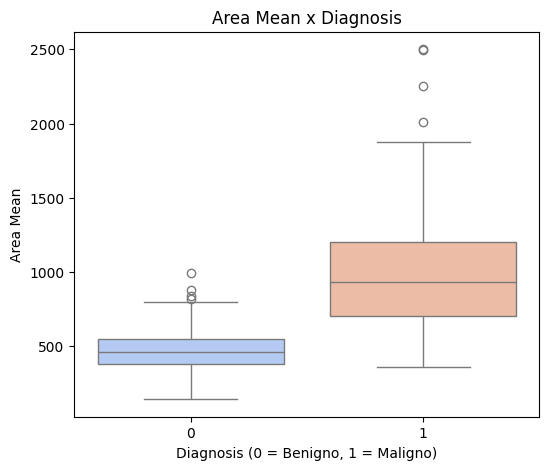

In [47]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='diagnosis', y='area_mean', data=df_cancer, palette="coolwarm")
plt.title("Area Mean x Diagnosis")
plt.xlabel("Diagnosis (0 = Benigno, 1 = Maligno)")
plt.ylabel("Area Mean")
plt.show()

O area_mean descreve a área média do tumor. Ele é calculado a partir da análise das imagens de mamografia, com base na quantidade de pixels que representam a região do tumor.

Não há duvidas visualmente que tumores malignos tem um tamanho maior do que tumores benignos, o que o grafico nos mostra é que até mesmo a media desses valores são muito espaçadas.

<ipython-input-48-844437062358>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='texture_worst', data=df_cancer, palette="coolwarm")


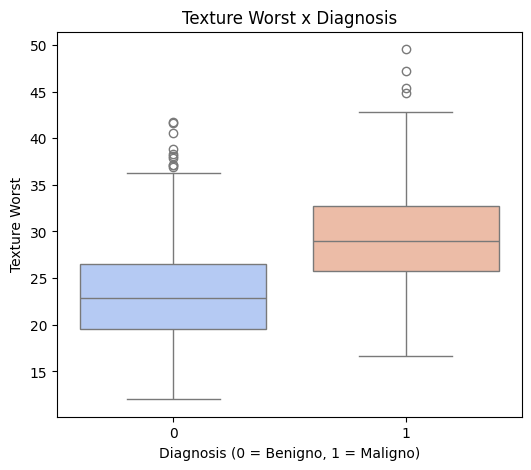

In [48]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='diagnosis', y='texture_worst', data=df_cancer, palette="coolwarm")
plt.title("Texture Worst x Diagnosis")
plt.xlabel("Diagnosis (0 = Benigno, 1 = Maligno)")
plt.ylabel("Texture Worst")
plt.show()

O texture_worst escreve a textura mais extrema ou mais irregular das células do tumor, considerando a variação de intensidade de pixel em imagens de mamografia.

O grafico nos mostra que as piores texturas estão mais relacionadas com o tumor maligno no nosso modelo, sendo em media maior do que os valores de tumores benignos.

<ipython-input-49-17cbb8b5b4b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='smoothness_mean', data=df_cancer, palette="coolwarm")


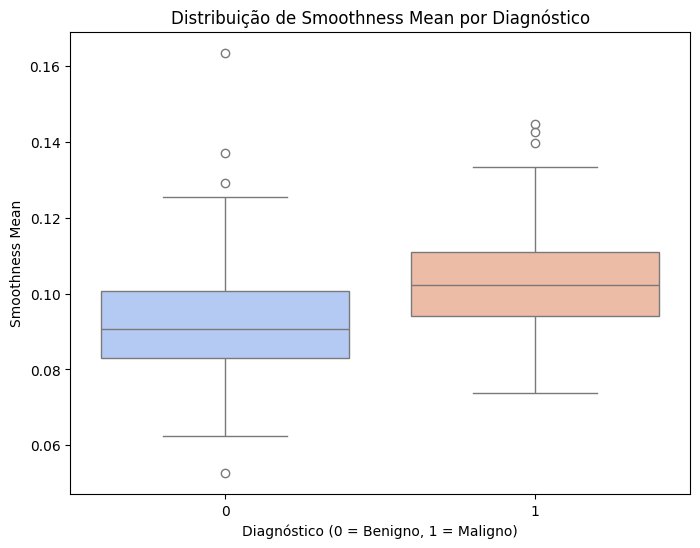

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='smoothness_mean', data=df_cancer, palette="coolwarm")
plt.title("Distribuição de Smoothness Mean por Diagnóstico")
plt.xlabel("Diagnóstico (0 = Benigno, 1 = Maligno)")
plt.ylabel("Smoothness Mean")
plt.show()

O smoothness_mean  refere-se à média da suavidade observada nas bordas do tumor em diferentes amostras ou cortes. A suavidade das bordas de um tumor pode ser um indicador de sua natureza — tumores malignos tendem a ter bordas mais irregulares e menos suaves, enquanto tumores benignos geralmente têm bordas mais regulares e suaves.

Mostrando que os maiores valores da media podem estar relacionado com o tumor maligno, essa suavidade define bem as classes.

<ipython-input-50-2f9da5867406>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='smoothness_worst', data=df_cancer, palette="coolwarm")


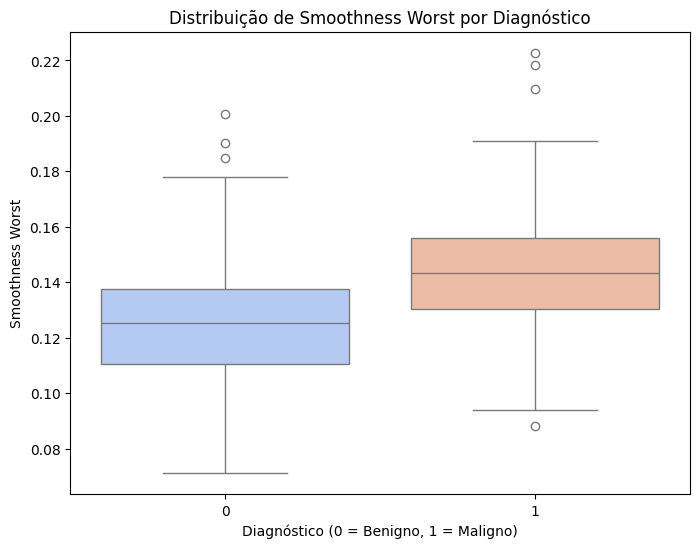

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='smoothness_worst', data=df_cancer, palette="coolwarm")
plt.title("Distribuição de Smoothness Worst por Diagnóstico")
plt.xlabel("Diagnóstico (0 = Benigno, 1 = Maligno)")
plt.ylabel("Smoothness Worst")
plt.show()

O smoothness_worst é uma característica do conjunto de dados de câncer de mama que se refere à "suavidade" das bordas do tumor, mas no caso de "worst" (pior), ou seja, a pior medida observada de suavidade entre as várias amostras de tumores.

Podemos observar que as piores amostras são mais relacionadas a classe 1. São valores proximos porém ainda há uma distinção dos valores

<ipython-input-51-c4242a3a977f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='smoothness_se', data=df_cancer, palette="coolwarm")


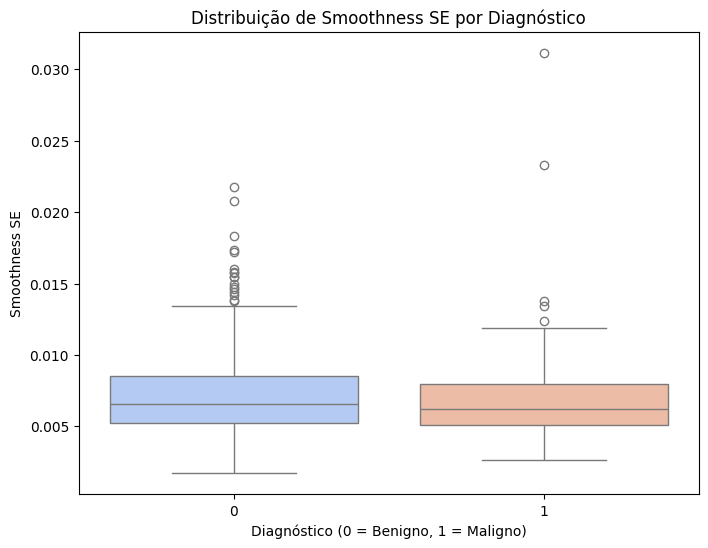

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='smoothness_se', data=df_cancer, palette="coolwarm")
plt.title("Distribuição de Smoothness SE por Diagnóstico")
plt.xlabel("Diagnóstico (0 = Benigno, 1 = Maligno)")
plt.ylabel("Smoothness SE")
plt.show()


A variável smoothness_se é suavidade da borda do tumor, mas com a adição de "SE", que significa "standard error" (erro padrão). O erro padrão aqui indica a variabilidade ou dispersão das medições de suavidade ao longo de várias amostras do tumor.

Então aqui vemos que as bordas dos tumores tem suavidade que são bem parecidas. Temos alguns valores outliers nas duas variaveis e muitos valores fora do box da classe 0 mostrando uma variação mais dos valores.

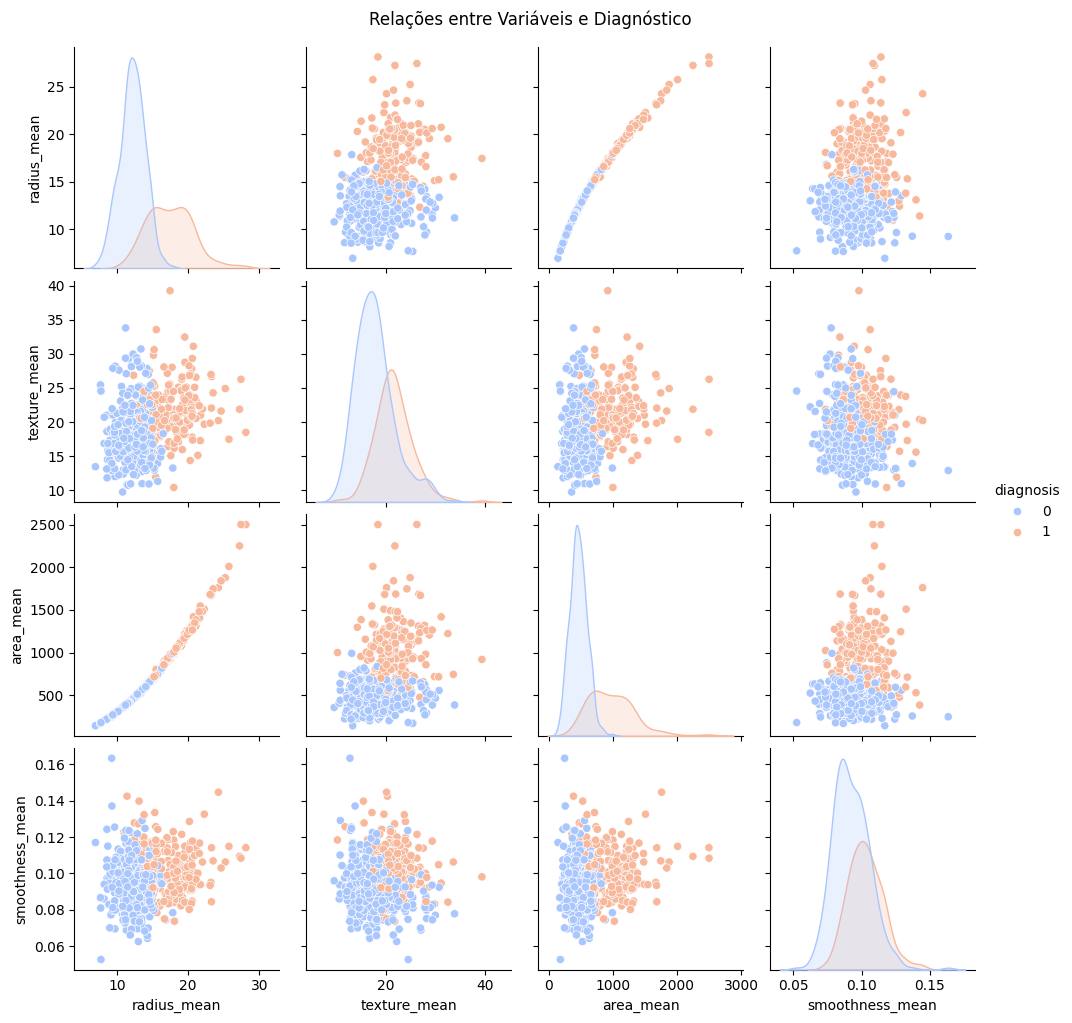

In [52]:
sns.pairplot(df_cancer[['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'diagnosis']], hue='diagnosis', palette="coolwarm")
plt.suptitle("Relações entre Variáveis e Diagnóstico", y=1.02)
plt.show()

<p>
Este gráfico fornece mais uma visualização de como os dados estão bem definidos e agrupados de forma clara.

No gráfico de smoothness_mean, vemos uma distribuição concentrada, como observado anteriormente, com muitos dados próximos e com pouca variação entre as classes.

No gráfico de smoothness_mean x smoothness_mean, os pontos se sobrepõem, indicando uma baixa variabilidade, o que torna a diferenciação entre as classes mais difícil.

Já nas outras variáveis, como radius_mean, texture_mean e area_mean, os grupos se separam de maneira mais evidente, mostrando uma boa definição entre as classes benignas e malignas.
</p>

In [53]:
df_cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [54]:
df_cancer.rename(columns={
    'concave points_se': 'concave_points_se',
    'concave points_mean': 'concave_points_mean',
    'concave points_worst': 'concave_points_worst'
}, inplace=True)

print(df_cancer.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


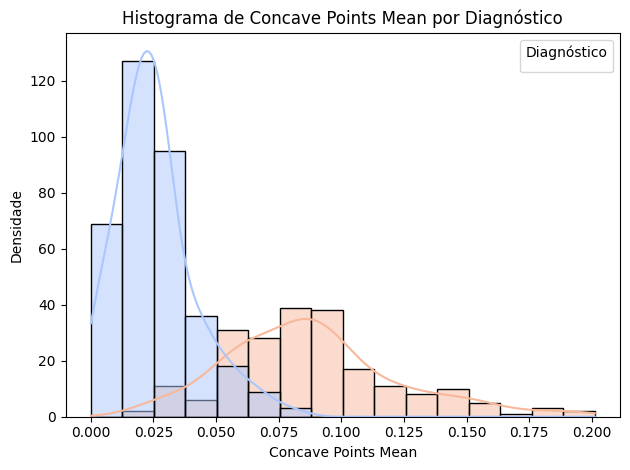

In [56]:
sns.histplot(data=df_cancer, x='concave_points_mean', hue='diagnosis', kde=True, palette="coolwarm")
plt.title("Histograma de Concave Points Mean por Diagnóstico")
plt.xlabel("Concave Points Mean")
plt.ylabel("Densidade")
plt.legend(title="Diagnóstico", loc='upper right')
plt.tight_layout()
plt.show()

Este gráfico mostra como os tumores malignos tendem a ser mais dispersos e com maior variação nos pontos côncavos, enquanto os tumores benignos são mais agrupados e apresentam menos irregularidades em sua forma. Isso sugere que os tumores malignos possuem características mais complexas e irregulares em comparação com os benignos.

# Modelos

In [61]:
X = df_cancer.drop(columns=['diagnosis'])
y = df_cancer['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
# Criando o modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
# Criando o modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:45:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [71]:
# Criando o modelo SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [72]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = y_pred

    # Cálculo das métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Exibindo as métricas
    print(f"Modelo: {model.__class__.__name__}")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")
    print("-" * 50)


In [73]:
evaluate_model(svm_model, X_test, y_test)
evaluate_model(xgb_model, X_test, y_test)
evaluate_model(rf_model, X_test, y_test)

Modelo: SVC
Acurácia: 0.9474
Precisão: 1.0000
Recall: 0.8605
F1-Score: 0.9250
AUC-ROC: 0.9302
--------------------------------------------------
Modelo: XGBClassifier
Acurácia: 0.9561
Precisão: 0.9524
Recall: 0.9302
F1-Score: 0.9412
AUC-ROC: 0.9908
--------------------------------------------------
Modelo: RandomForestClassifier
Acurácia: 0.9649
Precisão: 0.9756
Recall: 0.9302
F1-Score: 0.9524
AUC-ROC: 0.9953
--------------------------------------------------


## Avaliação Modelos

Os modelos de SVM, XGBoost e Random Forest demonstraram bons resultados, com o Random Forest se destacando com um F1-Score de 95,24%, o que o torna o modelo mais equilibrado. A combinação de Recall e Precisão com um F1-Score alto mostra que o modelo é eficaz na detecção de tumores malignos, minimizando falsos negativos, que são os mais críticos em diagnósticos de câncer.

Além disso, a AUC-ROC do RandomForest (0,9953) e do XGBoost (0,9908) são indicativos de que ambos os modelos têm um excelente poder discriminatório entre as classes, o que complementa a escolha do RandomForest como o melhor modelo.

Enquanto o SVM mostrou uma Precisão perfeita de 100%, o Recall foi mais baixo (86,05%), evidenciando que ele pode ter deixado passar alguns casos malignos, o que é um aspecto a ser melhorado.

Portanto, o Random Forest se destaca não apenas pela sua Acurácia e F1-Score, mas também pela sua capacidade de detectar corretamente os tumores malignos (a prioridade em diagnósticos médicos), o que o torna a melhor escolha para este problema de classificação de câncer de mama.

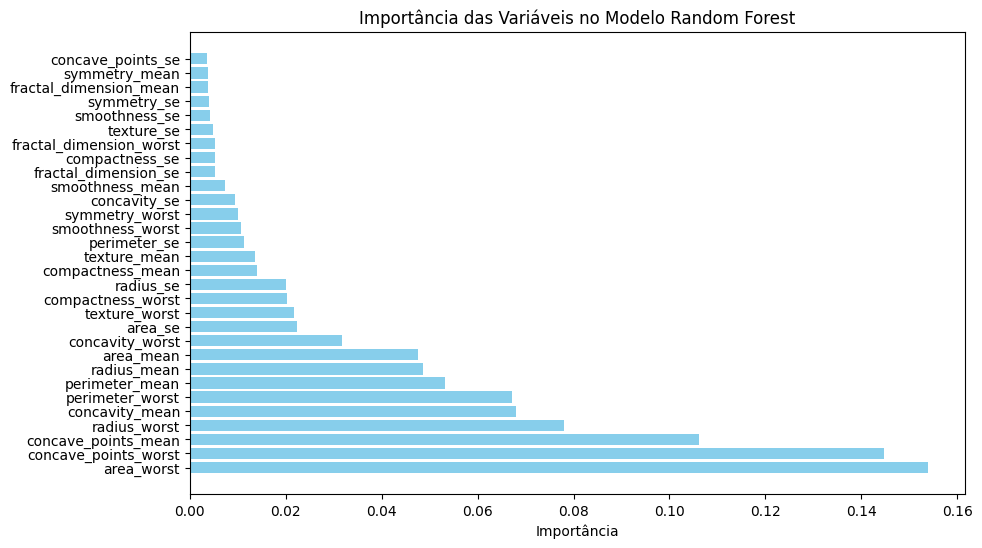

In [74]:
importances = rf_model.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.title('Importância das Variáveis no Modelo Random Forest')
plt.show()

Aqui, mostra a importância de cada variável para o nosso modelo, evidenciando que as variáveis como área, concavidade, perímetro e raio são as mais relevantes. Isso é importante para entendermos como o modelo avalia a importância de cada variável na decisão final, ajudando a compreender melhor os critérios usados para classificar os dados.

In [75]:
from sklearn.tree import export_graphviz
import graphviz

# Selecionar uma árvore do Random Forest
tree = rf_model.estimators_[0]

# Exportar a árvore para o formato DOT (formato usado pelo Graphviz)
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, class_names=['Benigno', 'Maligno'], filled=True, rounded=True)

# Visualizar a árvore com o Graphviz
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")
graph.view()

'random_forest_tree.pdf'

Por último, temos uma 'fotografia' da árvore de decisão. Embora o Random Forest utilize várias árvores para fazer suas previsões, é interessante observar como ele atribui pesos a cada variável em nosso conjunto de dados, ajudando a entender o impacto de cada uma na decisão final.